In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Mall_Customers.csv');

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:,[3,4]].values

In [5]:
#Using the elow method to find the optimal number of cluster

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [8]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049434,
 20736.679938924124]

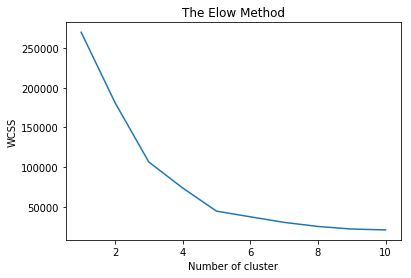

In [9]:
plt.plot(range(1,11),wcss)
plt.title('The Elow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [10]:
#Applying k-means to the mall dataset
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300,random_state=0)
y_kmeans = kmeans.fit_predict(X)

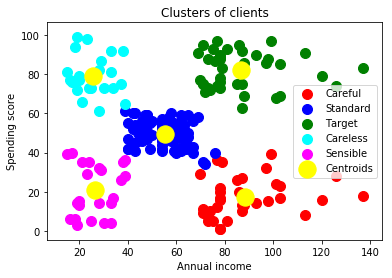

In [17]:
#Visulaising the cluster
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0, 1], s = 100, c ='red',label = 'Careful')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1, 1], s = 100, c ='blue',label = 'Standard')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2, 1], s = 100, c ='green',label = 'Target')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3, 1], s = 100, c ='cyan',label = 'Careless')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4, 1], s = 100, c ='magenta',label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300, c ='yellow',label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.legend()
plt.show()

In [22]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])